<a href="https://colab.research.google.com/github/arpitgits/Stock-Market-predictions-using-different-ML-algorithms-for-swing-and-day-trading/blob/main/fbprophet_StockPrediction_Swing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("TCS.NS.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-28,1147.0,1159.724976,1125.949951,1141.300049,1036.414185,1924296.0
1,2016-11-29,1137.5,1146.000000,1126.275024,1129.925049,1026.084717,1442296.0
2,2016-11-30,1132.5,1147.375000,1121.150024,1138.025024,1033.440430,3445832.0
3,2016-12-01,1138.5,1145.000000,1127.025024,1131.724976,1027.719116,1123052.0
4,2016-12-02,1129.0,1135.400024,1102.599976,1110.925049,1008.830811,1998032.0


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,2097.195656,2119.696202,2073.814149,2096.278512,2019.205775,3.090719e+06
std,714.967434,720.960114,707.820251,713.962642,745.430851,3.097558e+06
min,1080.250000,1092.224976,1072.824951,1077.275024,978.273499,8.682200e+04
25%,1468.881226,1485.887482,1459.506287,1471.481262,1365.793610,1.857258e+06
50%,2042.500000,2061.500000,2016.000000,2041.075012,1940.919983,2.578037e+06
75%,2285.224976,2324.062500,2258.824951,2280.274902,2246.029053,3.574815e+06
max,3930.000000,3989.899902,3900.000000,3954.550049,3946.976807,8.806715e+07


In [ ]:
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-11-28,1147.0,1159.724976,1125.949951,1141.300049,1036.414185,1924296.0
1,2016-11-29,1137.5,1146.000000,1126.275024,1129.925049,1026.084717,1442296.0
2,2016-11-30,1132.5,1147.375000,1121.150024,1138.025024,1033.440430,3445832.0
3,2016-12-01,1138.5,1145.000000,1127.025024,1131.724976,1027.719116,1123052.0
4,2016-12-02,1129.0,1135.400024,1102.599976,1110.925049,1008.830811,1998032.0


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


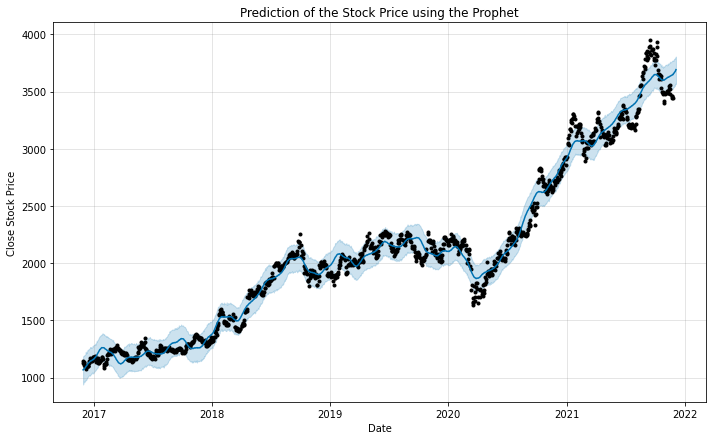

In [ ]:
future = m.make_future_dataframe(periods=10) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()